In [1]:
# Load Python libraries
from sklearn import cross_validation, grid_search, metrics, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lappy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Lappy\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#reading training data
df = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/train.csv')
df = df.sample(frac=0.4)

In [3]:
#using songs and members dataset
songs = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [4]:
#removing null values
df.isnull().sum()/df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.244937
source_screen_name         5.619446
source_type                0.288414
target                     0.000000
song_length                0.001694
genre_ids                  1.608286
artist_name                0.001694
composer                  22.740342
lyricist                  43.112546
language                   0.001999
city                       0.000000
bd                         0.000000
gender                    40.120882
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [5]:
#removing Nan values
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [6]:
# creating a column of registration_init_date  using month, year and day
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day
# creating expiration date using year, date, month

df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day


In [7]:
# conversion into categorical values
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [8]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
    
# encoding of categorical values
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [9]:
# Drop columns
df = df.drop(['expiration_date', 'lyricist'], 1)


In [10]:
#implementing PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[df.columns[df.columns != 'target']])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
from sklearn.linear_model import Perceptron
model = Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=200, n_iter=150, n_jobs=1, penalty='elasticnet', random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)
model.fit(df[df.columns[df.columns != 'target']], df.target)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=200, n_iter=150, n_jobs=1, penalty='elasticnet',
      random_state=0, shuffle=True, tol=None, verbose=0, warm_start=False)

In [12]:
#K fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
y = df['target'].values
model = Perceptron()
for train_indices,val_indices in kf.split(df) :
    model.fit(df.drop(['target'],axis=1).loc[train_indices,:],df.loc[train_indices,'target'])

model.score(df[df.columns[df.columns != 'target']], df.target,sample_weight=None)

0.50331060970861419

In [13]:
#reading test data
df_test=pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/test.csv')
#df_test = df_test.sample(frac=0.4)
songs = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/songs.csv')
df_test = pd.merge(df_test, songs, on='song_id', how='left')
del songs

# Preprocessing same as of training data
members = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/members.csv')
df_test = pd.merge(df_test, members, on='msno', how='left')
del members

df_test.isnull().sum()/df_test.isnull().count()*100


for i in df_test.select_dtypes(include=['object']).columns:
    df_test[i][df_test[i].isnull()] = 'unknown'
df_test = df_test.fillna(value=0)

df_test.registration_init_time = pd.to_datetime(df_test.registration_init_time, format='%Y%m%d', errors='ignore')
df_test['registration_init_time_year'] = df_test['registration_init_time'].dt.year
df_test['registration_init_time_month'] = df_test['registration_init_time'].dt.month
df_test['registration_init_time_day'] = df_test['registration_init_time'].dt.day


df_test.expiration_date = pd.to_datetime(df_test.expiration_date,  format='%Y%m%d', errors='ignore')
df_test['expiration_date_year'] = df_test['expiration_date'].dt.year
df_test['expiration_date_month'] = df_test['expiration_date'].dt.month
df_test['expiration_date_day'] = df_test['expiration_date'].dt.day

df_test['registration_init_time'] = df_test['registration_init_time'].astype('category')
df_test['expiration_date'] = df_test['expiration_date'].astype('category')


for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    

for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes
    

In [14]:
df_test.columns

Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date',
       'registration_init_time_year', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_year',
       'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [15]:
df_test = df_test.drop(['expiration_date', 'lyricist'], 1)

In [16]:
df_test.columns

Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_year', 'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [19]:
df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_year', 'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [17]:
predictions = np.zeros(shape=[len(df_test)])
predictions+=model.predict(df_test.drop(['id'],axis=1))

In [21]:
len(predictions)

2556790

In [22]:
predictions = predictions/3

submission = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/sample_submission.csv')
#submission = submission.sample(frac=0.6)
submission.target=predictions
submission.to_csv('perceptron.csv',index=False)

In [18]:
#hold out validation to plot roc curve

length=df['target'].count()
split = 0.40

test=df[int(length*(1-split)):length]
df=df[0:int(length*(1-split))]

In [19]:
#plotting ROC curves

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X_test = test.drop(['target'], axis=1)
predictions_roc = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(test['target'], predictions_roc)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr,tpr)

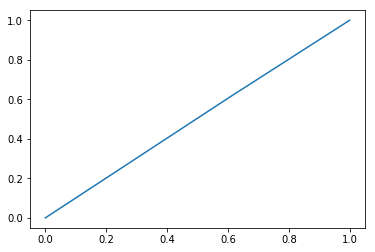

In [20]:
plt.show()

In [24]:
roc_auc

0.50258150594544815

In [27]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y,predictions, target_names=target_names))


             precision    recall  f1-score   support

    class 0       0.50      0.35      0.41   1270323
    class 1       0.50      0.65      0.57   1286467

avg / total       0.50      0.50      0.49   2556790

